<a href="https://colab.research.google.com/github/los61013/Human-Act---Deep-learning/blob/main/Human_Act_Deep_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **掛載硬碟**

In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [ ]:
%cd /content/gdrive/MyDrive/

/content/gdrive/MyDrive


In [ ]:
import os

if not os.path.isdir("資料探勘"):
  os.makedirs("資料探勘")

In [ ]:
%cd 資料探勘/

/content/gdrive/MyDrive/資料探勘


In [ ]:
! /opt/bin/nvidia-smi

Sun Feb  5 05:40:07 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 510.47.03    Driver Version: 510.47.03    CUDA Version: 11.6     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   65C    P0    31W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

**導入資料**

In [ ]:
import pandas as pd
import numpy as np

col_name = ["ID","act","time","x-acc","y-acc","z-acc"]
train_data = pd.read_csv("/content/gdrive/MyDrive/資料探勘/WISDM/WISDM_ar_v1.1_raw.txt", sep=",",names=col_name ,on_bad_lines='skip' ,low_memory=False)

#檢視資料
print(train_data.head())
print("train data:",train_data.shape)
print(train_data.info())

   ID      act            time     x-acc      y-acc     z-acc
0  33  Jogging  49105962326000 -0.694638  12.680544  0.503953
1  33  Jogging  49106062271000  5.012288  11.264028  0.953424
2  33  Jogging  49106112167000  4.903325  10.882658 -0.081722
3  33  Jogging  49106222305000 -0.612916  18.496431  3.023717
4  33  Jogging  49106332290000 -1.184970  12.108489  7.205164
train data: (1098204, 6)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1098204 entries, 0 to 1098203
Data columns (total 6 columns):
 #   Column  Non-Null Count    Dtype  
---  ------  --------------    -----  
 0   ID      1098204 non-null  int64  
 1   act     1098204 non-null  object 
 2   time    1098204 non-null  int64  
 3   x-acc   1098204 non-null  float64
 4   y-acc   1098204 non-null  float64
 5   z-acc   1098203 non-null  float64
dtypes: float64(3), int64(2), object(1)
memory usage: 50.3+ MB
None


# **資料清洗及轉換**

先將資料型態改為需要的型態
1.   ID、activity:category(類別)
2.   time:int64
3.   xyz-acc:f64





In [ ]:
#轉換資料型態
train_data.ID = train_data.ID.astype("category")
train_data.act = train_data.act.astype("category")
print(train_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1098204 entries, 0 to 1098203
Data columns (total 6 columns):
 #   Column  Non-Null Count    Dtype   
---  ------  --------------    -----   
 0   ID      1098204 non-null  category
 1   act     1098204 non-null  category
 2   time    1098204 non-null  int64   
 3   x-acc   1098204 non-null  float64 
 4   y-acc   1098204 non-null  float64 
 5   z-acc   1098203 non-null  float64 
dtypes: category(2), float64(3), int64(1)
memory usage: 35.6 MB
None


發現總資料筆數少三筆且不整齊    
首先檢查看看有沒有空值

In [ ]:
train_data.isnull().sum() #個欄位的空值總和

ID       0
act      0
time     0
x-acc    0
y-acc    0
z-acc    1
dtype: int64

有一個就直接刪掉了


In [ ]:
train_data = train_data.dropna() #丟棄全部空值
train_data.isnull().sum() #檢查個欄位空值

ID       0
act      0
time     0
x-acc    0
y-acc    0
z-acc    0
dtype: int64

再來檢查下各個活動的紀錄狀況  


In [ ]:
actcount = train_data.act.value_counts() #調出act的所有類型筆數
print(actcount)

Walking       424397
Jogging       342176
Upstairs      122869
Downstairs    100427
Sitting        59939
Standing       48395
Name: act, dtype: int64


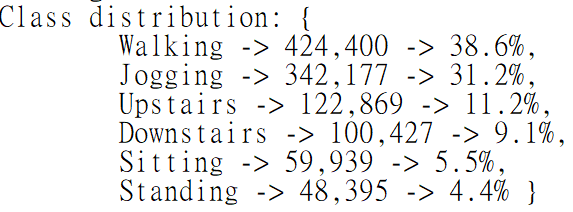  
跟說明文檔對比發現walking少兩筆  
jogging少一筆  
但由於少導入的資料過少所以就忽略不補了

In [ ]:
print(train_data.info()) #查看dataset

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1098203 entries, 0 to 1098203
Data columns (total 6 columns):
 #   Column  Non-Null Count    Dtype   
---  ------  --------------    -----   
 0   ID      1098203 non-null  category
 1   act     1098203 non-null  category
 2   time    1098203 non-null  int64   
 3   x-acc   1098203 non-null  float64 
 4   y-acc   1098203 non-null  float64 
 5   z-acc   1098203 non-null  float64 
dtypes: category(2), float64(3), int64(1)
memory usage: 44.0 MB
None


看起來沒問題了(?  
**接下來整理時間的資料**  
由於該時間資料是由時間戳記去紀錄  
先將時間戳記改回原本時間後再看看要怎麼處理


In [ ]:
df = train_data.copy() #做一個副本然後就可以做壞壞的事了
df.sort_values(by='time',ascending=True).head(100000)  #排序時間戳記大小

,ID,act,time,x-acc,y-acc,z-acc
882376,3,Walking,0,0.00,0.00,0.000000
164943,6,Jogging,0,0.00,0.00,0.000000
165014,6,Jogging,0,0.00,0.00,0.000000
165015,6,Jogging,0,0.00,0.00,0.000000
165027,6,Jogging,0,0.00,0.00,0.000000
...,...,...,...,...,...,...
660978,23,Jogging,813072307000,-4.67,19.53,-2.070000
923178,22,Walking,813072307000,4.94,7.74,0.800000
721187,34,Jogging,813092326000,9.72,3.79,0.840000
144477,15,Jogging,813102305000,0.38,8.81,5.216593


藏很深...這裡發現了一大堆無用資料  
先將時間戳記為0的資料全部丟掉(會影響act)

In [ ]:
#檢查個欄位的0值數量
for col in list(df.columns):
    zero = len(df[df[col] == 0])
    print("%s, 0值：%d" % (col, zero))

ID, 0值：0
act, 0值：0
time, 0值：12843
x-acc, 0值：16511
y-acc, 0值：13999
z-acc, 0值：17616


發現有12843筆0值的時間  
全部丟棄時間為0的資料並觀察排序後的100筆資料  
*XYZ的0值我選擇保留，畢竟可能真的剛好有些動作的XYZ真的為0

In [ ]:
df.time=df.time.replace(0,np.nan) #把0值取代為空值
df = df.dropna() #丟掉空值
df.sort_values(by='time',ascending=True).head(100000) #對時間欄位進行資料排序(值小的在前)

,ID,act,time,x-acc,y-acc,z-acc
456679,35,Standing,7.345234e+10,2.03,9.47,2.910000
456680,35,Standing,7.350233e+10,2.15,9.30,2.830000
456681,35,Standing,7.355235e+10,2.22,9.38,2.830000
456682,35,Standing,7.360234e+10,2.37,9.34,3.020000
456683,35,Standing,7.365232e+10,2.30,9.28,2.830000
...,...,...,...,...,...,...
723299,34,Jogging,9.187323e+11,4.14,13.63,8.050000
146616,15,Jogging,9.187424e+11,18.73,-0.38,8.349273
326320,35,Walking,9.187522e+11,1.99,5.09,-0.422231
543811,13,Standing,9.187623e+11,-5.37,8.24,0.190000


接下來將時間戳記轉換為時間

In [ ]:
import time
df.time = df.time.apply(lambda x: pd.to_datetime(x, unit='ns'))

In [ ]:
df.head()

,ID,act,time,x-acc,y-acc,z-acc
0,33,Jogging,1970-01-01 13:38:25.962326,-0.694638,12.680544,0.503953
1,33,Jogging,1970-01-01 13:38:26.062271,5.012288,11.264028,0.953424
2,33,Jogging,1970-01-01 13:38:26.112167,4.903325,10.882658,-0.081722
3,33,Jogging,1970-01-01 13:38:26.222305,-0.612916,18.496431,3.023717
4,33,Jogging,1970-01-01 13:38:26.332290,-1.184970,12.108489,7.205164


最後選擇將各筆資料的秒數保留作為特徵值

In [ ]:
df["sec"] = df.time.dt.second
df = df.drop("time", axis=1)
print(df.head())
df.info()

   ID      act     x-acc      y-acc     z-acc  sec
0  33  Jogging -0.694638  12.680544  0.503953   25
1  33  Jogging  5.012288  11.264028  0.953424   26
2  33  Jogging  4.903325  10.882658 -0.081722   26
3  33  Jogging -0.612916  18.496431  3.023717   26
4  33  Jogging -1.184970  12.108489  7.205164   26
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1085360 entries, 0 to 1098203
Data columns (total 6 columns):
 #   Column  Non-Null Count    Dtype   
---  ------  --------------    -----   
 0   ID      1085360 non-null  category
 1   act     1085360 non-null  category
 2   x-acc   1085360 non-null  float64 
 3   y-acc   1085360 non-null  float64 
 4   z-acc   1085360 non-null  float64 
 5   sec     1085360 non-null  int64   
dtypes: category(2), float64(3), int64(1)
memory usage: 43.5 MB


將act的動作改為數字標籤

In [ ]:
df["act"] = [0 if i == "Walking" else i for i in df["act"]]
df["act"] = [1 if i == "Jogging" else i for i in df["act"]]
df["act"] = [2 if i == "Upstairs" else i for i in df["act"]]
df["act"] = [3 if i == "Downstairs" else i for i in df["act"]]
df["act"] = [4 if i == "Sitting" else i for i in df["act"]]
df["act"] = [5 if i == "Standing" else i for i in df["act"]]
df.head()

,ID,act,x-acc,y-acc,z-acc,sec
0,33,1,-0.694638,12.680544,0.503953,25
1,33,1,5.012288,11.264028,0.953424,26
2,33,1,4.903325,10.882658,-0.081722,26
3,33,1,-0.612916,18.496431,3.023717,26
4,33,1,-1.184970,12.108489,7.205164,26


改完後最後確認資料型態

In [ ]:
df.act = df.act.astype("category")
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1085360 entries, 0 to 1098203
Data columns (total 6 columns):
 #   Column  Non-Null Count    Dtype   
---  ------  --------------    -----   
 0   ID      1085360 non-null  category
 1   act     1085360 non-null  category
 2   x-acc   1085360 non-null  float64 
 3   y-acc   1085360 non-null  float64 
 4   z-acc   1085360 non-null  float64 
 5   sec     1085360 non-null  int64   
dtypes: category(2), float64(3), int64(1)
memory usage: 43.5 MB


最後記得把df丟回去給Train_data

In [ ]:
train_data = df
train_data

,ID,act,x-acc,y-acc,z-acc,sec
0,33,1,-0.694638,12.680544,0.503953,25
1,33,1,5.012288,11.264028,0.953424,26
2,33,1,4.903325,10.882658,-0.081722,26
3,33,1,-0.612916,18.496431,3.023717,26
4,33,1,-1.184970,12.108489,7.205164,26
...,...,...,...,...,...,...
1098199,19,4,9.000000,-1.570000,1.690000,43
1098200,19,4,9.040000,-1.460000,1.730000,43
1098201,19,4,9.080000,-1.380000,1.690000,43
1098202,19,4,9.000000,-1.460000,1.730000,43


對整理好的資料作Label處理

In [ ]:
from sklearn.preprocessing import LabelEncoder
str_train = train_data.select_dtypes(include=['object',"category"])
le_label = LabelEncoder()
le_label.fit(str_train["act"])

encoded_Label_training = le_label.transform(str_train["act"])
str_train["act"] = encoded_Label_training
str_train["act"].value_counts()
train_data["act"] = str_train["act"]
train_data.act = train_data.act.astype("category")
train_data["act"].value_counts()

<ipython-input-21-c509d91ee037>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  str_train["act"] = encoded_Label_training


0    423905
1    330330
2    122598
3    100194
4     59939
5     48394
Name: act, dtype: int64

# **資料分割**  
把Train_data分割成訓練、測試資料

In [ ]:
from sklearn.model_selection import train_test_split
feaCols = [col for col in train_data.columns if col!="act"]
X_train,X_test,y_train,y_test = train_test_split(train_data[feaCols], train_data["act"], test_size=0.3, random_state=0)

用StandardScaler做資料正規化

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_Std = sc.transform(X_train)
X_test_Std = sc.transform(X_test)
#等等要給RNN的
RNNX_train_Std = X_train_Std
RNNX_test_Std= X_test_Std
#等等要給CNN的
CNNX_train_Std = X_train_Std
CNNX_test_Std= X_test_Std
#等等要給LCRN的
LCRNX_train_Std = X_train_Std
LCRX_test_Std= X_test_Std

做onehot編碼(不做餵不進去模型)

In [ ]:
from keras.utils import to_categorical
y_TrainOneHot = to_categorical(y_train,num_classes=6)
y_TestOneHot = to_categorical(y_test,num_classes=6)
#等等要給RNN的
RNNy_TrainOneHot = y_TrainOneHot
RNNy_TestOneHot = y_TestOneHot
#等等要給CNN的
CNNy_TrainOneHot = y_TrainOneHot
CNNy_TestOneHot = y_TestOneHot
#等等要給LCRN的
LCRNy_TrainOneHot = y_TrainOneHot
LCRNy_TestOneHot = y_TestOneHot

In [ ]:
print(X_train_Std.shape)
print(X_test_Std.shape)
print(y_TrainOneHot.shape)
print(y_TestOneHot.shape)


(759752, 5)
(325608, 5)
(759752, 6)
(325608, 6)


# **建立模型**

**DNN**(深度神經網路)  
深度神經網路是前向傳播網路(Feed Forward Networks)，數據從輸入層流往輸出層，資  
料不會再退回去。舉個例子，廚師會給你關於飯菜的想法，但你再次吃到相同口味的菜跟  
食材時你的腦袋不會有任何記憶，這就是DNN的概念，但這跟人腦的運作方式是不一樣的。

進行建模  
Input_Layer : Size = 64  
Hidden_Layer : Size = 128 ，activation=’relu’   
Hidden_Layer : Size = 256 ，activation=’relu’   
Output_Layer : Size = 6 ，activation=’softmax’  
用categorical_crossentropy作為預測分類的Loss Function  
用Adam作為模型優化器  
用accuracy算準確率  

In [ ]:
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Activation, Dense
def buildModelDNN(shape):
    model = Sequential()
    
    model.add(Dense(units=64, input_dim=shape[1], kernel_initializer='normal', activation='relu'))
    model.add(Dense(units=128, kernel_initializer='normal', activation='relu'))
    model.add(Dense(units=256, kernel_initializer='normal', activation='relu')) 
    model.add(Dense(units=512, kernel_initializer='normal', activation='relu'))
    
    model.add(Dense(units=6, kernel_initializer='normal', activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy']) 

    return model

In [ ]:
print(X_train_Std.shape)
model = buildModelDNN(X_train_Std.shape)
model.summary()
train_history = model.fit(X_train_Std, y_TrainOneHot, validation_split=0.2, epochs=10, batch_size=32, verbose=2) 

(759752, 5)
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                384       
                                                                 
 dense_1 (Dense)             (None, 128)               8320      
                                                                 
 dense_2 (Dense)             (None, 256)               33024     
                                                                 
 dense_3 (Dense)             (None, 512)               131584    
                                                                 
 dense_4 (Dense)             (None, 6)                 3078      
                                                                 
Total params: 176,390
Trainable params: 176,390
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
18994/18994 - 64s - loss: 0

In [ ]:
DNNscores = model.evaluate(X_test_Std, y_TestOneHot)  
print('Loss :{} , Accuracy:{} '.format(DNNscores[0],DNNscores[1]))

10176/10176 [==============================] - 27s 3ms/step - loss: 0.6606 - accuracy: 0.7483
Loss :0.6605833768844604 , Accuracy:0.7483446598052979 


**RNN**(循環神經網路)  
RNN可以說是改良的DNN，具有時間扭曲的特性，訊息會再流通回去，他有內存機制來  
處理這些序列資料，RNN可以提供現在以及過去的訊息，這也代表任何拿來訓練  
的資料都非常重要。這裡有一個小重點：當訊息隨著時間序列的推移而消失時，失去  
的是資料處理的權重，而不是真正的神經元。  

---
*這邊選擇用LSTM(長短期記憶模型)  
因應RNN會有梯度消失問題，無法在長時間序列上有好的記憶性表現，因此通過3種閘門  
控制，結合短期記憶與長期記憶，分別是input gate,forget gate,output gate，  
因為沒時間處理好GRU但畢竟成效差不多所以先使用LSTM看看
。

將訓練跟測試資料reshape成LSTM的格式

In [ ]:
RNNX_train = RNNX_train_Std.reshape(len(X_train), X_train.shape[1], 1)
RNNX_test = RNNX_test_Std.reshape(len(X_test), X_test.shape[1], 1)
print(RNNX_train.shape, RNNX_test.shape)  
n_features = 1

(759752, 5, 1) (325608, 5, 1)


建模  
結構跟上面DNN差不多

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
from keras.models import Sequential
from keras.layers import LSTM

def buildModelRNN(shape):
    model = Sequential()
    model.add(LSTM(64, activation='relu',input_shape=[shape[1], n_features],return_sequences=True)) 
    model.add(LSTM(128, activation='relu',return_sequences=True))
    model.add(LSTM(128)))     
    model.add(Dense(6))
    model.compile(optimizer='adam', loss='mse', metrics=['accuracy'])
    
    return model

訓練模型

In [ ]:
model = buildModelRNN(RNNX_train.shape)
model.summary()
RNNtrain_history = model.fit(RNNX_train, RNNy_TrainOneHot, epochs=10, validation_split = 0.2, batch_size=32, verbose=2)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 5, 64)             16896     
                                                                 
 lstm_1 (LSTM)               (None, 5, 128)            98816     
                                                                 
 lstm_2 (LSTM)               (None, 256)               394240    
                                                                 
 dense_5 (Dense)             (None, 6)                 1542      
                                                                 
Total params: 511,494
Trainable params: 511,494
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
18994/18994 - 515s - loss: 0.0845 - accuracy: 0.6304 - val_loss: 0.0722 - val_accuracy: 0.6908 - 515s/epoch - 27ms/step
Epoch 2/10
18994/18994 - 506s - loss: 0.0663 - ac

測試模型準確度

In [ ]:
RNNscores = model.evaluate(RNNX_test, RNNy_TestOneHot)  
print('Loss :{} , Accuracy:{} '.format(RNNscores[0],RNNscores[1]))

10176/10176 [==============================] - 51s 5ms/step - loss: 0.0542 - accuracy: 0.7698
Loss :0.05420146882534027 , Accuracy:0.769830584526062 


**CNN**(卷積神經網路)  
卷積神經網路是一種最常用來分析視覺圖像的深度神經網路，應用包括影音理解、語音識別，理解自然語言處理，CNN的架構類似於大腦的額葉，負責的工作就是處理視覺感官。  
CNN的結構包括了:  
1.   卷積層(Convolutional layer):處理多數的計算、檢查特徵。
2.   池化層(Pooling layer:特徵掃描及過濾，與卷積層不同的是降低了許多參數，提高了效率降低了複雜性。 
3.   全連接層(Fully connected layer):根據前幾層處理程序來提取特徵進行特徵分類的地方，層層相扣每一層都有相連節點。

將訓練跟測試資料reshape成CNN的格式

In [ ]:
CNNX_train = CNNX_train_Std.reshape(len(X_train), X_train.shape[1], 1)
CNNX_test = CNNX_test_Std.reshape(len(X_test), X_test.shape[1], 1)
CNNX_train.shape, CNNX_test.shape

((759752, 5, 1), (325608, 5, 1))

建模

In [ ]:
from tensorflow import keras
from keras.layers import Conv2D, Conv1D, MaxPooling2D, MaxPooling1D, Flatten, BatchNormalization, Dense
from tensorflow.keras import layers
from keras.models import Sequential

def buildModelCNN(shape):
    model = Sequential()
    #卷積+池化層
    model.add(Conv1D(filters=64, kernel_size=3, activation='relu',padding='same', input_shape=(shape[1],1)))
    model.add(MaxPooling1D(pool_size=(3), padding='same'))
    
    model.add(Conv1D(filters=128, kernel_size=3, activation='relu',padding='same'))
    model.add(MaxPooling1D(pool_size=(3), padding='same'))
    
    model.add(Conv1D(filters=256, kernel_size=3, activation='relu',padding='same'))
    model.add(MaxPooling1D(pool_size=(3), padding='same'))
    #連接層
    model.add(Flatten())
    model.add(Dense(512, activation='relu'))
    model.add(Dense(6, activation='softmax'))
    
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

訓練模型

In [ ]:
model = buildModelCNN(CNNX_train.shape)
model.summary()
CNNtrain_history = model.fit(CNNX_train, CNNy_TrainOneHot, epochs=10, validation_split = 0.2, batch_size=32, verbose=2)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 5, 64)             256       
                                                                 
 max_pooling1d (MaxPooling1D  (None, 2, 64)            0         
 )                                                               
                                                                 
 conv1d_1 (Conv1D)           (None, 2, 128)            24704     
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 1, 128)           0         
 1D)                                                             
                                                                 
 conv1d_2 (Conv1D)           (None, 1, 256)            98560     
                                                                 
 max_pooling1d_2 (MaxPooling  (None, 1, 256)          

測試模型準確度

In [ ]:
CNNscores = model.evaluate(CNNX_test, CNNy_TestOneHot)
print('Loss :{} , Accuracy:{} '.format(CNNscores[0],CNNscores[1]))

# **結論**

模型準確度:  
**RNN>DNN≒CNN**  
訓練時間:  
**RNN>CNN>DNN**

個人心得及後續優化想法
---
資料清洗的話其實我的traindata還整理得沒有很好，尤其是shape資料跟格式編碼的部分  
另外像是重複值我沒有去檢查、時間的秒數沒有照參考資料說明的20HZ(0.5毫秒)去設  
定特徵等等...都還有可改善的空間。  
模型的部分因為經驗不夠所以隱藏層裡面的單元數量都是隨機設定的，所以理論上了解  
資料型態跟模型的關係後去優化模型應該可以減少很多訓練時間跟提升準確度

# **後續優化**

**模型決定**

鑒於瞭解資料有時序及模式的特性後，決定使用CNN+LSTM的混合模型。  
該模型又稱為LRCN(long-term recurrent convolutional network)，意旨在LSTM前加入CNN。CNN會作為特徵提取器，LSTM則處理時序資料的Input。該架構也可用來處理自然語言之類的領域。

**資料再清洗**

由於發現資料的重複值會影響先刪除重複值。

In [ ]:
df = train_data.copy() #做一個副本然後就可以做壞壞的事了
print(df.info())

In [ ]:
column_names = ['ID', 'act', 'x-acc', 'y-acc', 'z-acc', 'sec']
print(df[df.duplicated(subset=column_names, keep=False)])

In [ ]:
df.drop_duplicates(subset=column_names, keep='first', inplace=True)
print(df[df.duplicated(subset=column_names, keep=False)])

In [ ]:
#train_data.to_csv("/content/gdrive/MyDrive/資料探勘/WISDM/WISDM_afterdata.csv")

本來打算對資料差異做處理，但看完資料分布後還沒想到辦法，之後想到再看看。

In [ ]:
df.groupby(["ID", "act"]).size().reset_index(name="次數")

In [ ]:
from collections import Counter
pd.DataFrame.from_dict(Counter(df["act"]),orient='index',columns=["act"])

把資料筆數調整一下方便等等reshape

In [ ]:
df.drop(df.head(16).index,inplace=True)

In [ ]:
df.info()
train_data = df
train_data

**重新切割、編碼資料**

In [ ]:
from sklearn.model_selection import train_test_split
feaCols = [col for col in train_data.columns if col!="act"]
X_train,X_test,y_train,y_test = train_test_split(train_data[feaCols], train_data["act"], test_size=0.2, random_state=0)

標準化

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
LCRNX_train_Std = sc.transform(X_train)
LCRNX_test_Std = sc.transform(X_test)

onehot


In [ ]:
from keras.utils import to_categorical
LCRNy_TrainOneHot = to_categorical(y_train,num_classes=6)
LCRNy_TestOneHot = to_categorical(y_test,num_classes=6)

In [ ]:
print(LCRNX_train_Std.shape)
print(LCRNX_test_Std.shape)

print(LCRNy_TrainOneHot.shape)
print(LCRNy_TestOneHot.shape)

In [ ]:
LCRNX_train = LCRNX_train_Std.reshape(40756, 20, 5)
LCRNX_test = LCRNX_test_Std.reshape(10189, 20, 5)
LCRNX_train.shape, LCRNX_test.shape

建模

In [ ]:
from keras.layers import Input, Dense, LSTM, MaxPooling1D, Conv1D
from keras.models import Model
from keras.models import Sequential
def buildModelLCRN(shape):
    model = Sequential()
    #model.add(Dense(128,input_shape=(shape[1],shape[2])))
    model.add(Conv1D(filters=64, kernel_size=3, activation='relu',padding='same', input_shape=(shape[1],shape[2])))
    model.add(MaxPooling1D(pool_size=2, padding='valid'))

    model.add(LSTM(32,return_sequences=True))
    model.add(LSTM(16,return_sequences=False))
    #model.add(Dense(20, activation="softmax"))
    model.add(Dense(6, activation="softmax"))
    model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
    return model

訓練

In [ ]:
model = buildModelLCRN(LCRNX_train.shape)
model.summary()
LCRNtrain_history = model.fit(LCRNX_train, LCRNy_TrainOneHot, epochs=10, validation_split = 0.2, batch_size=32, verbose=2)

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_3 (Conv1D)           (None, 20, 64)            1024      
                                                                 
 max_pooling1d_3 (MaxPooling  (None, 10, 64)           0         
 1D)                                                             
                                                                 
 lstm_3 (LSTM)               (None, 10, 32)            12416     
                                                                 
 lstm_4 (LSTM)               (None, 16)                3136      
                                                                 
 dense_8 (Dense)             (None, 6)                 102       
                                                                 
Total params: 16,678
Trainable params: 16,678
Non-trainable params: 0
__________________________________________________

# 結論

感覺怪怪的，理論上混合模型的表現會比之前的模型好。  
但結果卻是差很多，應該是我模型的超參數設定不對所以導致模型訓練的準確度上不去。  
暫時先去找資料來看看，目前知道關於超參數最佳化的方式有PSO(粒子群演算法)、GA(基因演算法)、SA(模擬退火法)...先去研究這些後再回來改看看。

